In [13]:
#AZURE
from azure.identity import DefaultAzureCredential
from azure.identity import ManagedIdentityCredential
from azure.keyvault.secrets import SecretClient
from azure.storage.blob import BlockBlobService
from azure.storage.blob import ContentSettings
#GENERAL
import http.client
import mimetypes
import json
import requests
from pandas import json_normalize
import sys, os
import pandas as pd
import datetime as dt
from copy import deepcopy
#ARCGIS
from arcgis.features.manage_data import dissolve_boundaries
from arcgis.features.find_locations import find_centroids
from arcgis.geometry import from_geo_coordinate_string
from arcgis.geocoding import geocode
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry
from arcgis.gis import GIS
import arcgis
from arcgis import geometry 
from arcgis import features
from arcgis.geoanalytics import manage_data
from arcgis.features.manage_data import overlay_layers
from arcgis.features import GeoAccessor, GeoSeriesAccessor, FeatureLayer
from arcgis.features import FeatureLayerCollection

In [14]:
gis=GIS("https://fpcwa.maps.arcgis.com", "FPCWA_GISadmin", "FPCgis001")

#  PLANTATIONS PTN

In [15]:

item=gis.content.get('8c83203d447c410b812301fd1866b738')
l=item.layers[0]
#df=pd.DataFrame.spatial.from_layer(l) #OR
#df=pd.DataFrame.spatial.from_layer(l) #OR
#df=l.query(out_fields='*', return_centroid=True).sdf
#df=l.query(where="Ops_Code='LNP9NFC'",out_fields='*', return_centroid=True).sdf
#df=l.query(out_fields='*', return_centroid=True).sdf
df=l.query(where="Ops_Code in ('UBE4AF1','JGCF9BF1')",out_fields='*', return_centroid=True).sdf


In [16]:
NFitem=gis.content.get('4354f6a95ae74f6c8111b861db1fd20a')
m=NFitem.layers[0]
#m=NFitem.layers[0].query()
#lk=m.features
#m.spatial_reference
#from arcgis.geometry import project
#project()
#arcgis.geometry.project(geometries, in_sr=28350, out_sr=4283)

###  PLANTATIONS PTN Dissolve Boundaries

In [17]:
dissolve_fields=['PLANTATION','Ops_Code']
point_centroid = dissolve_boundaries(l, dissolve_fields,estimate=True,output_name='findcentroids', future=True)


In [18]:
dissolve_fieldsNF=['LOIS']
point_centroidNF = dissolve_boundaries(m, dissolve_fieldsNF,estimate=True,output_name='zentroidsNF', future=True)

In [19]:
item=gis.content.get('ab3b4b713ae94e8d93b5e6781ef9b095')
l=item.layers[0] 
coupe=l.query().sdf.drop(columns=['FID', 'Cpt',  'Code', 'Regrowth', 'Area', 'CarryOverY',
       'CarryOve00',  'Shape__Area', 'Shape__Length', 'GlobalID',
       'CreationDate', 'Creator', 'EditDate', 'Editor', 'SHAPE'])

###  PLANTATIONS PTN Calculate Centroids

In [20]:
item = gis.content.search("findcentroids",item_type="Feature Layer Collection")
c= gis.content.get('{}'.format(item[0].id)).layers[0]
poly_to_point = find_centroids(c, output_name="HealthLyrPolygonToPoint", future=True)

In [21]:
itemz = gis.content.search("zentroidsNF",item_type="Feature Layer Collection")


f= gis.content.get('{}'.format(itemz[0].id)).layers[0]
poly_to_point = find_centroids(f, output_name="nfpLyrNF", future=True)

In [23]:
item = gis.content.search("HealthLyrPolygonToPoint",item_type="Feature Layer Collection")

table= gis.content.get('{}'.format(item[0].id)).layers[0].query().sdf
#items=gis.content.search('HealthLyrPolygonToPoint')
#df1=items.layers[0].query().sdf
table


,OBJECTID,PLANTATION,Ops_Code,Count_,AnalysisArea,ORIG_FID,SHAPE
0,1,Aldersyde 2,AZZ8IF1,4,0.250083,1,"{""x"": 117.24828568400005, ""y"": -32.32631899199..."
1,2,Aldersyde 3,AZZ8JF1,2,0.050546,2,"{""x"": 117.33824169500008, ""y"": -32.40182271099..."
2,3,Amelup 1,None,5,0.229571,3,"{""x"": 118.27739797100003, ""y"": -34.21528904399..."
3,4,Badgingarra 2,AZZ8JF1,2,0.017687,4,"{""x"": 115.53550494500007, ""y"": -30.37146741399..."
4,5,Badgingarra 2,AZZ8KF1,14,0.115910,5,"{""x"": 115.53564437900002, ""y"": -30.37168942499..."
...,...,...,...,...,...,...,...
423,424,Yathroo 4,AZZ2GF1,4,0.473357,424,"{""x"": 115.63707093100004, ""y"": -30.81088499599..."
424,425,Yathroo 6,AZZ2IF1,9,0.619652,425,"{""x"": 115.87185148900005, ""y"": -30.87493061699..."
425,426,Yathroo 6,AZZ2KF1,1,0.058163,426,"{""x"": 115.87076556300008, ""y"": -30.87934508999..."
426,427,Yathroo 9,None,1,0.007314,427,"{""x"": 115.88059131500006, ""y"": -30.80818972799..."


In [24]:
item = gis.content.search("nfpLyrNF",item_type="Feature Layer Collection")

tableNT= gis.content.get('{}'.format(item[0].id)).layers[0].query().sdf
#items=gis.content.search('HealthLyrPolygonToPoint')
#df1=items.layers[0].query().
tableNT

,OBJECTID,LOIS,Count_,AnalysisArea,ORIG_FID,SHAPE
0,1,BQG0218,14,0.897043,1,"{""x"": 371016.4310999997, ""y"": 6266012.9433, ""s..."
1,2,CLE0418,9,1.317405,2,"{""x"": 446171.6327999998, ""y"": 6315190.7245, ""s..."
2,3,CPA0118,4,0.758469,3,"{""x"": 426291.8388, ""y"": 6318851.9405, ""spatial..."
3,4,DFEWL20,7,0.513789,4,"{""x"": 410970.11199999973, ""y"": 6355995.8891, ""..."
4,5,DHE0417,10,1.787672,5,"{""x"": 433856.75370000023, ""y"": 6372519.4652, ""..."
...,...,...,...,...,...,...
56,57,WMA0518,2,0.620499,57,"{""x"": 463611.78529999964, ""y"": 6170310.7625, ""..."
57,58,WMA0618,1,0.547224,58,"{""x"": 464288.4425999997, ""y"": 6169856.4524, ""s..."
58,59,WMA0620,3,0.390824,59,"{""x"": 464817.5126, ""y"": 6170052.4582, ""spatial..."
59,60,WMA1218,3,1.758970,60,"{""x"": 464978.67370000016, ""y"": 6168864.8365, ""..."


# Find NF Plantation Names

In [25]:
tableNT.rename(columns={'LOIS':'Ops_Code'}, inplace=True)
tableNT

,OBJECTID,Ops_Code,Count_,AnalysisArea,ORIG_FID,SHAPE
0,1,BQG0218,14,0.897043,1,"{""x"": 371016.4310999997, ""y"": 6266012.9433, ""s..."
1,2,CLE0418,9,1.317405,2,"{""x"": 446171.6327999998, ""y"": 6315190.7245, ""s..."
2,3,CPA0118,4,0.758469,3,"{""x"": 426291.8388, ""y"": 6318851.9405, ""spatial..."
3,4,DFEWL20,7,0.513789,4,"{""x"": 410970.11199999973, ""y"": 6355995.8891, ""..."
4,5,DHE0417,10,1.787672,5,"{""x"": 433856.75370000023, ""y"": 6372519.4652, ""..."
...,...,...,...,...,...,...
56,57,WMA0518,2,0.620499,57,"{""x"": 463611.78529999964, ""y"": 6170310.7625, ""..."
57,58,WMA0618,1,0.547224,58,"{""x"": 464288.4425999997, ""y"": 6169856.4524, ""s..."
58,59,WMA0620,3,0.390824,59,"{""x"": 464817.5126, ""y"": 6170052.4582, ""spatial..."
59,60,WMA1218,3,1.758970,60,"{""x"": 464978.67370000016, ""y"": 6168864.8365, ""..."


In [26]:
tableNT['PLANTATION']=tableNT['Ops_Code'].map(dict(zip(coupe.LOIS,coupe.Block_Cpt)))

In [27]:
table=table.append(tableNT)
table=table[table.PLANTATION.notna()]

In [28]:
kl = gis.content.search("HealthLyrPolygonToPoint")[0]

kl.delete()

True

In [29]:
kl2 = gis.content.search("nfpLyrNF")[0]

kl2.delete()

True

In [30]:
lj = gis.content.search("findcentroids")[0]

lj.delete()


True

In [31]:
lj2 = gis.content.search("zentroidsNF")[0]

lj2.delete()

True

In [32]:
table

,OBJECTID,PLANTATION,Ops_Code,Count_,AnalysisArea,ORIG_FID,SHAPE
0,1,Aldersyde 2,AZZ8IF1,4,0.250083,1,"{""x"": 117.24828568400005, ""y"": -32.32631899199..."
1,2,Aldersyde 3,AZZ8JF1,2,0.050546,2,"{""x"": 117.33824169500008, ""y"": -32.40182271099..."
2,3,Amelup 1,None,5,0.229571,3,"{""x"": 118.27739797100003, ""y"": -34.21528904399..."
3,4,Badgingarra 2,AZZ8JF1,2,0.017687,4,"{""x"": 115.53550494500007, ""y"": -30.37146741399..."
4,5,Badgingarra 2,AZZ8KF1,14,0.115910,5,"{""x"": 115.53564437900002, ""y"": -30.37168942499..."
...,...,...,...,...,...,...,...
56,57,Mattaband05,WMA0518,2,0.620499,57,"{""x"": 463611.78529999964, ""y"": 6170310.7625, ""..."
57,58,Mattaband06,WMA0618,1,0.547224,58,"{""x"": 464288.4425999997, ""y"": 6169856.4524, ""s..."
58,59,Mattaband06,WMA0620,3,0.390824,59,"{""x"": 464817.5126, ""y"": 6170052.4582, ""spatial..."
59,60,Mattaband12,WMA1218,3,1.758970,60,"{""x"": 464978.67370000016, ""y"": 6168864.8365, ""..."


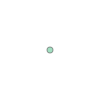

In [36]:
pt = Point({"x" : -118.15, "y" : 33.80, 
            "spatialReference" : {"wkid" : 4326}})
pt

In [60]:
#for x in table.SHAPE.astype(str):
    #print(Point(x).coordinates())
table.SHAPE.astype(str).apply(lambda x: Point(x).coordinates()).str[0]


0        117.248286
1        117.338242
2        118.277398
3        115.535505
4        115.535644
          ...      
56    463611.785300
57    464288.442600
58    464817.512600
59    464978.673700
60    449416.094600
Name: SHAPE, Length: 480, dtype: float64

In [34]:
geom = from_geo_coordinate_string(spatial_ref=44283, strings=table, conversion_type='Minute DD')
#https://community.esri.com/t5/arcgis-api-for-python-questions/from-geo-coordinate-string/td-p/848901
#https://developers.arcgis.com/python/api-reference/arcgis.geometry.html#from-geo-coordinate-string

Exception: Invalid or missing input parameters.
the input is not a geographic or projected coordinate system
(Error Code: 400)

In [ ]:
#table['SHAPE']=table.SHAPE.astype(str)
#table.dtypes

In [ ]:
#table['SHAPE'].str.split("(spatialReference)")